# **1. "Revolutionize banking with cutting-edge Machine Learning: House Price Prediction, empowering banks to make smarter lending decisions and mitigate risks effectively."**


# **2. INTRODUCTION**

"Dalam era modern ini, ketika teknologi semakin merambah berbagai aspek kehidupan, industri perbankan juga semakin menggabungkan inovasi teknologi untuk mengoptimalkan layanan dan pengambilan keputusan. Penelitian yang saya lakukan, berfokus pada prediksi harga rumah dengan menggunakan teknik Machine Learning. Penelitian ini memiliki tujuan : memberikan dunia perbankan opsi yang kuat untuk mengantisipasi dan mengelola risiko kredit serta mengoptimalkan pengambilan keputusan dalam penilaian aset properti. Lalu Bank juga dapat menggunakan hasil prediksi ini untuk menilai kelayakan pinjaman hipotek dengan lebih tepat, mengidentifikasi potensi risiko kredit, dan merencanakan strategi investasi yang lebih cerdas.

Dalam pandangan lebih luas, penelitian ini bukan hanya tentang memprediksi harga rumah semata, tetapi juga tentang memberikan solusi yang inovatif bagi dunia perbankan dalam menghadapi tantangan kompleks. Melalui penggabungan teknologi Machine Learning dengan kebijakan risiko perbankan, penelitian ini membuka peluang baru untuk pengambilan keputusan yang lebih akurat dan responsif. Dengan model prediksi harga rumah ini, kami berharap dapat memberikan kontribusi positif bagi efisiensi operasional bank serta memperkuat daya saing industri dalam menghadapi dinamika pasar properti yang selalu berubah."

# **3. EXTERNAL LINK**

1. Dataset : https://www.kaggle.com/datasets/nafisbarizki/daftar-harga-rumah-jabodetabek
2. Presentasi : https://www.canva.com/design/DAFrVEzKCc8/sbq4gx0e9NxikodcEyh94A/edit?utm_content=DAFrVEzKCc8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton
3. Dashboard : https://lookerstudio.google.com/reporting/6064f6cd-4d72-4787-83b2-cb650f59158f/page/1M
4. Deployment : https://huggingface.co/spaces/Dzlkrn/House_Price_Prediction

# **4. WORKING AREA**

## **A. LIBRARIES & DATASET LOADING**

In [5]:
!pip install phik
!pip install feature_engine
!pip install dataprep


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import phik
import imblearn

from dataprep.eda import create_report
from numpy import array
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_error, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings(action='ignore')

%matplotlib inline


In [7]:
df = pd.read_csv('/content/jabodetabek_house_price.csv')
df

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,https://www.rumah123.com/properti/tangerang/ho...,5.880000e+08,Terbaru Cluster Minimalis Sudimara Dekat Stasiun,"Jombang, Tangerang",Jombang,Tangerang,-6.296615,106.704601,"Masjid, Taman, Tempat Jemuran, Keamanan 24 ja...",rumah,...,1300 mah,0.0,0.0,1.0,0.0,2022.0,baru,NaN,1.0,furnished
3549,https://www.rumah123.com/properti/tangerang/ho...,7.850000e+08,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,7.550000e+08,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,8.000000e+08,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,"Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...",rumah,...,2200 mah,0.0,0.0,2.0,0.0,2022.0,baru,selatan,0.0,furnished


## **B. DATA PREPROCESSING**

### B.1. DATASET OVERVIEW

In [8]:
#info detail dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [ ]:
report = create_report(df)
report
#apabila ingin melihat summary secara general bisa menggunakan sintaks diatas

### B.2. DATA CLEANING

In [11]:
#duplikasi dataframe
df_dc = df.copy()

#### **COLUMNS HANDLING**

##### **HANDLING DATA YANG TIDAK SESUAI**

**1. Kolom 'price_in_rp'**

Peneliti melakukan pengecekkan terhadap kolom 'price_in_rp' dimana terdapat beberapa value harga yang dalam asumsi peneliti *typo* pada saat penulisan, oleh karena-nya peneliti melakukan penyesuaian

In [12]:
#mencari 10 nilai terbesar pada kolom 'price_in_rp'
df_dc['price_in_rp'].nlargest(10)

2906    5.800000e+11
2479    2.500000e+11
2291    1.750000e+11
2515    1.750000e+11
2488    1.500000e+11
2417    1.100000e+11
2398    1.080000e+11
2287    1.060000e+11
2419    1.000000e+11
2143    8.500000e+10
Name: price_in_rp, dtype: float64

In [13]:
#menyesuaikan value
df_dc.loc[df_dc['price_in_rp'] == 580000000000.0, 'price_in_rp'] = 58000000000.0
df_dc.loc[df_dc['price_in_rp'] == 250000000000.0, 'price_in_rp'] = 25000000000.0
df_dc.loc[df_dc['price_in_rp'] == 175000000000.0, 'price_in_rp'] = 17500000000.0
df_dc.loc[df_dc['price_in_rp'] == 150000000000.0, 'price_in_rp'] = 15000000000.0
df_dc.loc[df_dc['price_in_rp'] == 110000000000.0, 'price_in_rp'] = 11000000000.0
df_dc.loc[df_dc['price_in_rp'] == 108000000000.0, 'price_in_rp'] = 10800000000.0
df_dc.loc[df_dc['price_in_rp'] == 106000000000.0, 'price_in_rp'] = 10600000000.0
df_dc.loc[df_dc['price_in_rp'] == 100000000000.0, 'price_in_rp'] = 10000000000.0

In [14]:
#recek
df_dc['price_in_rp'].nlargest(10)

2143    8.500000e+10
2648    8.500000e+10
2626    8.280000e+10
2662    7.000000e+10
2420    6.900000e+10
2421    6.900000e+10
2056    6.300000e+10
2906    5.800000e+10
2305    5.500000e+10
2399    5.500000e+10
Name: price_in_rp, dtype: float64

In [15]:
#recek
df_dc['carports'].nlargest(10)

2307    15.0
2545    14.0
2659    14.0
522     12.0
1332    10.0
1385    10.0
2056    10.0
2283    10.0
2308    10.0
2329    10.0
Name: carports, dtype: float64

**2. Kolom 'prorerty_type'**

In [16]:
#cek kesalahan pada kolom terkait
df.iloc[2282]

url                     https://www.rumah123.com/properti/jakarta-sela...
price_in_rp                                                 26000000000.0
title                   Rumah Kost Exclusive 21 Kt di Cipete, Ala Hote...
address                                           Cipete, Jakarta Selatan
district                                                           Cipete
city                                                      Jakarta Selatan
lat                                                             -6.272585
long                                                           106.805543
facilities               Kolam Renang,  Taman, Jalur Telepon, Tempat J...
property_type                                                       rumah
ads_id                                                        hos11142642
bedrooms                                                             21.0
bathrooms                                                            21.0
land_size_m2                          

In [17]:
#revisi value kolom terkait
df_dc.loc[df_dc['title'].str.contains('kos|kost|Kos|Kost', case=False), 'property_type'] = 'kost'

In [18]:
#recek
df_dc.iloc[2282]

url                     https://www.rumah123.com/properti/jakarta-sela...
price_in_rp                                                 26000000000.0
title                   Rumah Kost Exclusive 21 Kt di Cipete, Ala Hote...
address                                           Cipete, Jakarta Selatan
district                                                           Cipete
city                                                      Jakarta Selatan
lat                                                             -6.272585
long                                                           106.805543
facilities               Kolam Renang,  Taman, Jalur Telepon, Tempat J...
property_type                                                        kost
ads_id                                                        hos11142642
bedrooms                                                             21.0
bathrooms                                                            21.0
land_size_m2                          

##### **DROPPING KOLOM TAK TERPAKAI**

Peneliti akan membuang beberapa kolom tidak terpakai :

1. Address, peneliti berasumsi informasi yang sama sudah tersaji di kolom lain
2. Url, peneliti berasumsi tidak memiliki kaitan dengan prediksi harga rumah
3. Title, peneliti berasumsi tidak memiliki kaitan dengan prediksi harga rumah
4. building_age, peneliti berasumsi bahwa nilainya tidak relevan dengan tahun 2023

In [19]:
#membuang kolom tak terpakai
df_dc.drop(['address', 'url', 'title', 'building_age'], axis=1, inplace=True)


##### **PENYESUAIAN TIPE DATA**

In [20]:
#menghapus unit "mah" dari nilai dalam kolom
df_dc['electricity'] = df_dc['electricity'].str.replace(' mah', '')

#mengganti 'lainnya' dengan '0' pada kolom 'electricity'
df_dc['electricity'] = df_dc['electricity'].str.replace('lainnya', '0')

#mengubah jenis data kolom 'electricity' menjadi float (jika belum float)
df_dc['electricity'] = df_dc['electricity'].astype(float)

#mengubah nilai '0' dengan nilai median pada kolom 'electricity'
median_value = df_dc['electricity'].median()
df_dc['electricity'] = df_dc['electricity'].replace(0, median_value)

##### **DUPLICATED DATA HANDLING**

In [21]:
#pengecekkan data duplikat pada dataframe
df_dc[df_dc.duplicated()].shape

(68, 23)

Tidak terdapat data duplikat

#### **EDA**

##### 1. Tipe Properti

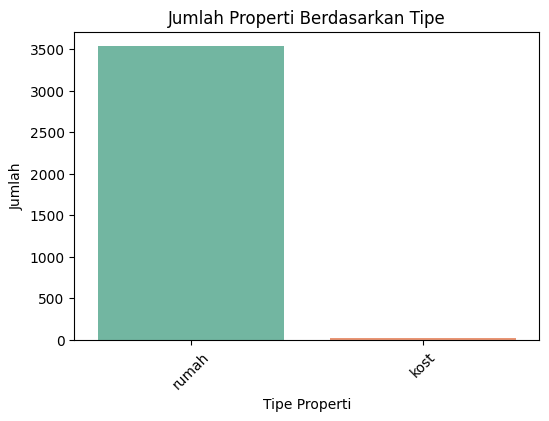

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_dc, x='property_type', palette='Set2')
plt.title('Jumlah Properti Berdasarkan Tipe')
plt.xlabel('Tipe Properti')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


Pada dataset ini terdapat dua jenis properti yakni :
1. Rumah
2. Kost
Dimana mayoritas jenis properti yang ada pada dataset ini merupakan Rumah

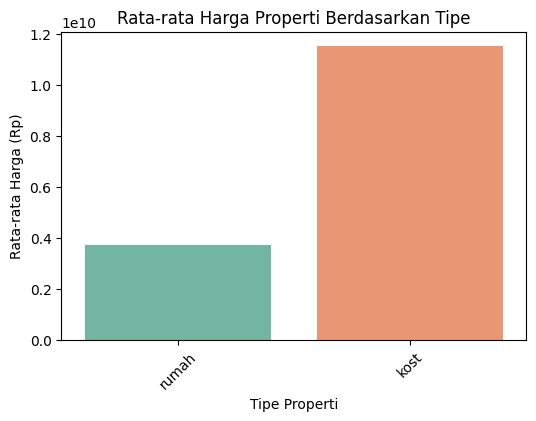

In [59]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_dc, x='property_type', y='price_in_rp', ci=None, palette='Set2')
plt.title('Rata-rata Harga Properti Berdasarkan Tipe')
plt.xlabel('Tipe Properti')
plt.ylabel('Rata-rata Harga (Rp)')
plt.xticks(rotation=45)
plt.show()


Akan tetapi berdasarkan harganya, rata-rata harga kost pada wilayah Jabodetabek jauh lebih tinggi bahkan hampir tiga kali lipat dibandingkan dengan harga rumah.

##### 2. Kota/Kabupaten

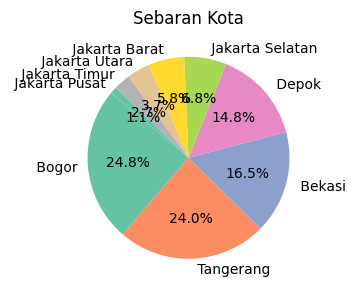

In [62]:
plt.subplot(1, 2, 1)
city_counts = df['city'].value_counts()
colors = plt.cm.Set2.colors
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sebaran Kota')

plt.tight_layout()
plt.show()

Dari dataset diatas mayoritas properti yang dijual berada di wilayah Bogor.

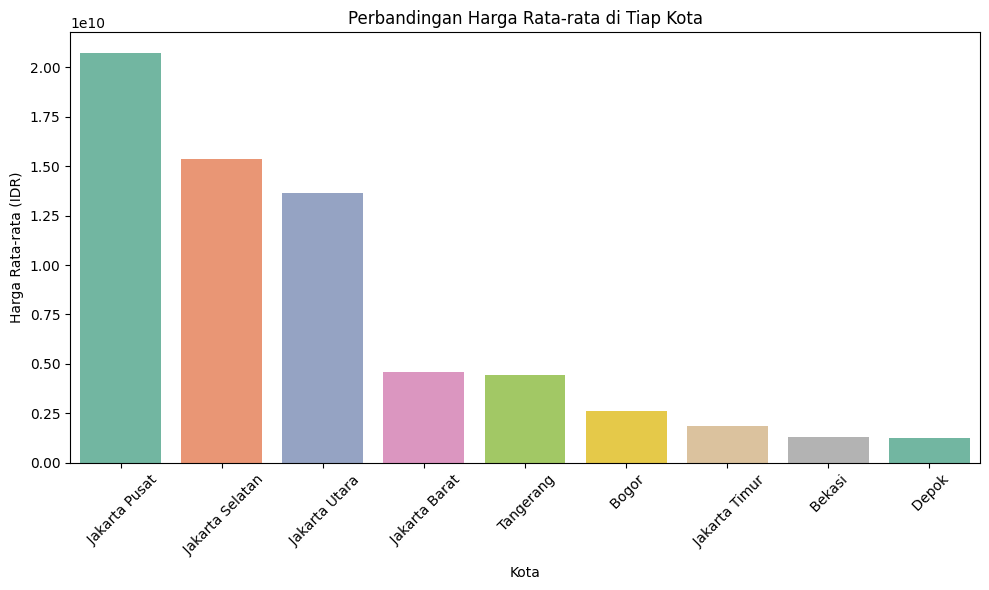

In [57]:
#urutan kota berdasarkan harga rata-rata
sorted_cities = df.groupby('city')['price_in_rp'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='city', y='price_in_rp', estimator='mean', ci=None, order=sorted_cities, palette='Set2')
plt.title('Perbandingan Harga Rata-rata di Tiap Kota')
plt.xlabel('Kota')
plt.ylabel('Harga Rata-rata (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasrkan visualisasi diatas dapat dilihat top 3 properti dengan harga rata-rata paling tinggi ada di Provinsi Jakarta.

Peneliti beranggapan hal tersebut dikarenakan karena harga tanah dan bangunan di wilayah tersebut yang sangat tinggi, namun apabila dilihat juga dari dataset, bisa saja hal tersebut dikarenakan jenis properti yang dijual pada ketiga wilayah tersebut terdapat jenis properti 'kost' yang mana harganya memang sangat tinggi.

##### Tipe Furnishing

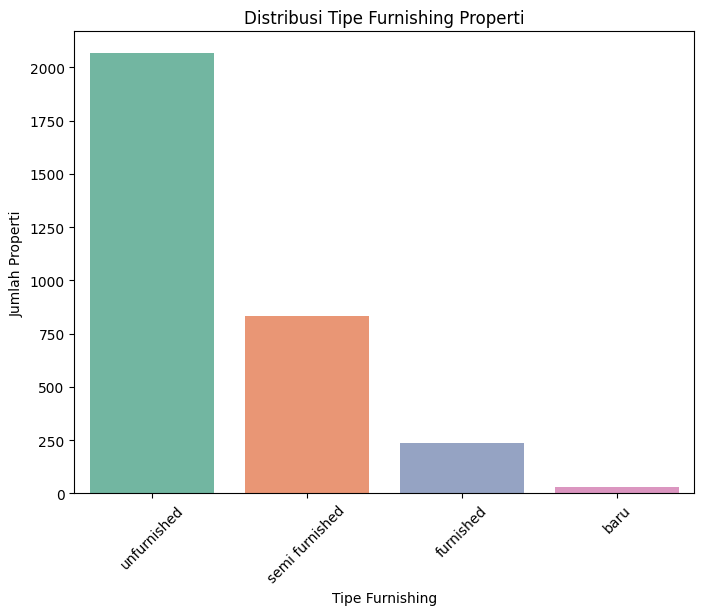

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='furnishing', palette='Set2')
plt.title('Distribusi Tipe Furnishing Properti')
plt.xlabel('Tipe Furnishing')
plt.ylabel('Jumlah Properti')
plt.xticks(rotation=45)
plt.show()


Pada dataset ini mayoritas tipe properti memiliki tipe unfurnished atau belum terdapat furnitur pada propertinya. Dimana berdasarkan asumsi peneliti seharusnya tipe properti seperti ini memiliki harga yang seharusnya tidak tinggi. Dan akan dibutkikan pada visualisasi dibawah.

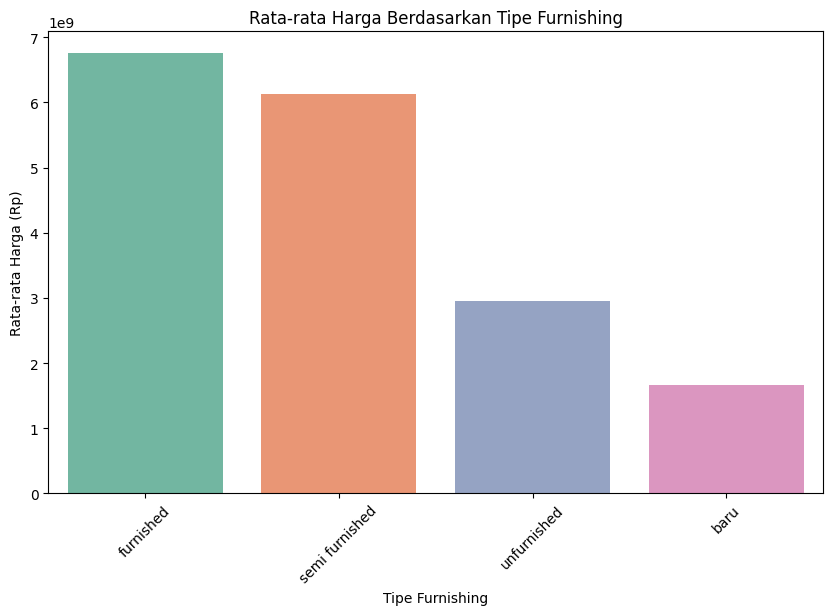

In [63]:
plt.figure(figsize=(10, 6))
average_price_by_furnishing = df.groupby('furnishing')['price_in_rp'].mean().sort_values(ascending=False)
sns.barplot(x=average_price_by_furnishing.index, y=average_price_by_furnishing.values, palette='Set2')
plt.title('Rata-rata Harga Berdasarkan Tipe Furnishing')
plt.xlabel('Tipe Furnishing')
plt.ylabel('Rata-rata Harga (Rp)')
plt.xticks(rotation=45)
plt.show()


Berdasarkan asumsi peneliti sebelumny terbuki bahwa tipe rumah yang *unfurnished* lebih rendah. Dan berdasarkan visualisasi diatas, dapat kita lihat bahwa rata-rata harga properti paling tinggi dimiliki oleh jenis *furnished* atau telah terdapat furnitur di dalam propertinya.

#### **FEATURES SELECTION**

Peneliti menggunakan teknik *PHIK* correlation untuk mengetahui fitur (informasi) apa yang paling berpengaruh terhadap harga rumah.

In [22]:
#resampling
sample_size = 500
df_dc_resampled = df_dc.sample(n=sample_size, random_state=42)

#korelasi
cor_tbl = df_dc_resampled.phik_matrix()
cor_tbl.sort_values(by=['price_in_rp'], ascending=False, inplace=True)

print(cor_tbl)

interval columns not set, guessing: ['price_in_rp', 'lat', 'long', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports', 'electricity', 'maid_bedrooms', 'maid_bathrooms', 'floors', 'year_built', 'garages']
                      price_in_rp  district      city       lat      long  \
price_in_rp              1.000000  0.837739  0.741602  0.249392  0.000000   
ads_id                   1.000000  1.000000  1.000000  1.000000  1.000000   
facilities               0.911419  0.997415  0.933012  0.541442  0.664230   
building_size_m2         0.845828  0.637042  0.584528  0.219419  0.000000   
district                 0.837739  1.000000  0.999014  0.999396  0.999521   
electricity              0.805770  0.713900  0.468519  0.076461  0.000000   
carports                 0.762383  0.853240  0.374420  0.000000  0.000000   
garages                  0.747431  0.777372  0.437060  0.360735  0.060104   
city                     0.741602  0.999014  1.000000  0.772369  0.772910   
land_

In [23]:
#memunculkan fitur yang memiliki korelasi diatas 0,4
filtered_cor_tbl = cor_tbl.query('price_in_rp > 0.4')
print(filtered_cor_tbl)


                  price_in_rp  district      city       lat      long  \
price_in_rp          1.000000  0.837739  0.741602  0.249392  0.000000   
ads_id               1.000000  1.000000  1.000000  1.000000  1.000000   
facilities           0.911419  0.997415  0.933012  0.541442  0.664230   
building_size_m2     0.845828  0.637042  0.584528  0.219419  0.000000   
district             0.837739  1.000000  0.999014  0.999396  0.999521   
electricity          0.805770  0.713900  0.468519  0.076461  0.000000   
carports             0.762383  0.853240  0.374420  0.000000  0.000000   
garages              0.747431  0.777372  0.437060  0.360735  0.060104   
city                 0.741602  0.999014  1.000000  0.772369  0.772910   
land_size_m2         0.688730  0.801136  0.227414  0.470829  0.000000   
maid_bathrooms       0.622413  0.817428  0.566554  0.317036  0.311968   
maid_bedrooms        0.601688  0.413388  0.390569  0.208611  0.328334   
year_built           0.581749  0.575509  0.383773  

Berdasarkan hasil uji korelasi diatas, peneliti hanya mengambil fitur-fitur yang memiliki skor diatas 0,5. Berdasarkan uji korelasi diatas, berikut beberapa fitur terpilih :

1. facilities
2. building_size_m2
3. district
4. electricity
5. carports
6. garages
7. city
8. land_size_m2
9. maid_bathrooms
10. maid_bedrooms
11. year_built
12. bathrooms
13. bedrooms         




In [24]:
#menentukan kolom untuk target dan fitur
selected_features = ['facilities','building_size_m2', 'district', 'electricity', 'carports', 'garages', 'city', 'land_size_m2', 'maid_bathrooms', 'maid_bedrooms', 'year_built', 'bathrooms', 'bedrooms']

X = df_dc[selected_features]
y = df_dc['price_in_rp']

#### **CEK MISSING VALUE**

In [25]:
#hitung jumlah kolom-kolom yang memiliki missing value
missing_values = X.isnull().sum()

print(missing_values)

facilities             0
building_size_m2       2
district               0
electricity            0
carports               0
garages                0
city                   0
land_size_m2           2
maid_bathrooms         0
maid_bedrooms          0
year_built          1445
bathrooms             29
bedrooms              34
dtype: int64


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   facilities        3553 non-null   object 
 1   building_size_m2  3551 non-null   float64
 2   district          3553 non-null   object 
 3   electricity       3553 non-null   float64
 4   carports          3553 non-null   float64
 5   garages           3553 non-null   float64
 6   city              3553 non-null   object 
 7   land_size_m2      3551 non-null   float64
 8   maid_bathrooms    3553 non-null   float64
 9   maid_bedrooms     3553 non-null   float64
 10  year_built        2108 non-null   float64
 11  bathrooms         3524 non-null   float64
 12  bedrooms          3519 non-null   float64
dtypes: float64(10), object(3)
memory usage: 361.0+ KB


Missing values akan di handling bersamaan dengan pembuatan *pipeline* dimana missing value pada ketiga kolom diatas akan diisi dengan nilai median.

### B.3. DATA SPLITING

In [27]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,facilities,building_size_m2,district,electricity,carports,garages,city,land_size_m2,maid_bathrooms,maid_bedrooms,year_built,bathrooms,bedrooms
1128,"Taman, Keamanan",200.0,Ciparigi,3500.0,0.0,1.0,Bogor,153.0,0.0,1.0,NaN,3.0,4.0
3434,"Taman, Jalur Telepon, Keamanan, Keamanan 24 j...",110.0,Poris,2200.0,0.0,1.0,Tangerang,55.0,0.0,0.0,NaN,2.0,3.0
195,"Tempat Jemuran, Ac, Jogging Track, Lapangan ...",310.0,Mustikajaya,3300.0,1.0,0.0,Bekasi,210.0,1.0,1.0,2015.0,4.0,4.0
532,"Taman, Keamanan 24 jam",80.0,Pondok Ungu,1300.0,2.0,2.0,Bekasi,119.0,0.0,0.0,NaN,1.0,2.0
2478,Jalur Telepon,854.0,Pondok Indah,7700.0,0.0,0.0,Jakarta Selatan,850.0,2.0,2.0,2007.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,"Taman, Keamanan",200.0,Ciparigi,3500.0,1.0,1.0,Bogor,153.0,0.0,1.0,NaN,3.0,4.0
1294,"Keamanan 24 jam, Taman, Jalur Telepon, Masjid...",60.0,Parung,1300.0,1.0,0.0,Bogor,64.0,0.0,0.0,2022.0,2.0,3.0
860,"Jalur Telepon, Taman, Keamanan, Kolam Renang",600.0,Sentul City,5500.0,2.0,2.0,Bogor,1118.0,1.0,1.0,2021.0,6.0,6.0
3507,"Keamanan, Taman",595.0,Sutera Onix Alam Sutera,5500.0,2.0,2.0,Tangerang,383.0,1.0,2.0,2011.0,4.0,4.0


## C. **MODELING**

### C.1. PIPELINE

In [29]:
# Definisi fitur numerik dan kategorikal
fitur_numerik = ['building_size_m2', 'electricity', 'carports', 'garages', 'land_size_m2', 'maid_bathrooms', 'maid_bedrooms', 'year_built', 'bathrooms', 'bedrooms']
fitur_kategorik = ['facilities', 'district', 'city']

# Pipeline untuk fitur numerik
num_cols = Pipeline([
    ('impute mean', SimpleImputer(strategy='median')),
    ('winsorize', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal
cat_cols = Pipeline([
    ('impute mode', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline utama
full_pipeline = ColumnTransformer(
    transformers=[
        ("numerik", num_cols, fitur_numerik),
        ("kategorik", cat_cols, fitur_kategorik)
    ]
)

### C.2. MODELING

**Linear Regression**

In [30]:
#pipeline Linear Regression
linear_regression_pipeline = Pipeline([
    ('preprocess', full_pipeline),
    ('linear_regression', LinearRegression())
])

#melatih pipeline pada data training
linear_regression_pipeline.fit(X_train, y_train)

#prediksi harga pada data training dan testing
y_train_pred = linear_regression_pipeline.predict(X_train)
y_test_pred = linear_regression_pipeline.predict(X_test)

#evaluasi model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regressor")
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Test MSE:", test_mse)
print("Test R2:", test_r2)


Linear Regressor
Train MSE: 2.77997615973952e+18
Train R2: 0.9336411667061327
Test MSE: 4.368456244062616e+19
Test R2: 0.27227792623254277


**Random Forest Regressor**

In [31]:
#pipeline Random Forest Regressor
random_forest_pipeline = Pipeline([
    ('preprocess', full_pipeline),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

#melatih pipeline pada data training
random_forest_pipeline.fit(X_train, y_train)

#prediksi harga pada data training dan testing
y_train_pred = random_forest_pipeline.predict(X_train)
y_test_pred = random_forest_pipeline.predict(X_test)

#evaluasi model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Regressor")
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Test MSE:", test_mse)
print("Test R2:", test_r2)

Random Forest Regressor
Train MSE: 1.7468855420914086e+18
Train R2: 0.9583013379215553
Test MSE: 2.482840371337762e+19
Test R2: 0.5863944508270593


**Gradient Boosting Regressor**

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

#pipeline Gradient Boosting Regressor
gradient_boosting_pipeline = Pipeline([
    ('preprocess', full_pipeline),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

#melatih pipeline pada data training
gradient_boosting_pipeline.fit(X_train, y_train)

#prediksi harga pada data training dan testing
y_train_pred = gradient_boosting_pipeline.predict(X_train)
y_test_pred = gradient_boosting_pipeline.predict(X_test)

#evaluasi model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Gradient Boosting Regressor")
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Test MSE:", test_mse)
print("Test R2:", test_r2)


Gradient Boosting Regressor
Train MSE: 3.7038771205422643e+18
Train R2: 0.9115873841140915
Test MSE: 2.2699430574724473e+19
Test R2: 0.6218600858454166


**Lasso Regression**

In [33]:
from sklearn.linear_model import Lasso

#pipeline Lasso Regression
lasso_pipeline = Pipeline([
    ('preprocess', full_pipeline),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])

#melatih pipeline pada data training
lasso_pipeline.fit(X_train, y_train)

#prediksi harga pada data training dan testing
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

#evaluasi model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Lasso Regression")
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Test MSE:", test_mse)
print("Test R2:", test_r2)


Lasso Regression
Train MSE: 2.7799803615128387e+18
Train R2: 0.9336410664085909
Test MSE: 4.400868786742559e+19
Test R2: 0.2668784621067013


Berdasarkan hasil pengujian beberapa model, model yang terbaik dihasilkan oleh Gradient Boosting Regressor, meski hasilnya masih terbilang overfit, maka dari itu peneliti akan melakukan model improvement dengan *tunning*

### C.3. MODEL IMPROVEMENT

In [37]:
#hyperparameter
param_grid = {
    'gradient_boosting__n_estimators': [50, 100, 150],
    'gradient_boosting__max_depth': [3, 4, 5],
    'gradient_boosting__min_samples_split': [2, 5, 10],
    'gradient_boosting__min_samples_leaf': [1, 2, 4],
    'gradient_boosting__learning_rate': [0.01, 0.1, 0.2]
}

#GridCV
grid_search = GridSearchCV(gradient_boosting_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

#train GridCV
grid_search.fit(X_train, y_train)

#model terbaik
best_model = grid_search.best_estimator_

#prediksi
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#evaluasi
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Tuned Gradient Boosting Regressor")
print("Best Parameters:", grid_search.best_params_)
print("Train MSE:", train_mse)
print("Train R2:", train_r2)
print("Test MSE:", test_mse)
print("Test R2:", test_r2)

Tuned Gradient Boosting Regressor
Best Parameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 4, 'gradient_boosting__min_samples_leaf': 1, 'gradient_boosting__min_samples_split': 10, 'gradient_boosting__n_estimators': 150}
Train MSE: 2.396514544952389e+18
Train R2: 0.9427945061263674
Test MSE: 2.4137914110540603e+19
Test R2: 0.5978970159809252


Berdasarkan hasil *tunning* diatas, hasil yang ditunjukkan masih tergolong overfit. Oleh karenanya peneliti akan menggunakan based model terbaik yakni gradient boosting

### C.4 MODEL SAVING

In [34]:
gradient_boosting_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('impute '
                                                                   'mean',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('winsorize',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['building_size_m2',
                                                   'electricity', 'carports',
                                                   'garages', 'land_size_m2',
                                                   'maid_bathrooms',
                                                   'maid_bedrooms',
                                                   'year_built', 'bathrooms',
                                                   'bedrooms']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('impute '
                                                                   'mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['facilities', 'district',
                                                   'city'])])),
                ('gradient_boosting',
                 GradientBoostingRegressor(random_state=42))])

In [35]:
joblib.dump(gradient_boosting_pipeline, 'model_final_project')

['model_final_project']

# CONCLUSIONS AND OVERALL ANALYSIS

**Conclusions:**

1. Hasil dari penelitian menunjukkan adanya indikasi overfit sebelum dan setelah dilakukan tuning. Meskipun telah dilakukan penyetelan (tuning) pada model, terlihat bahwa hasil prediksi masih menunjukkan adanya perbedaan yang signifikan antara performa pada data latih dan data uji. Oleh karena itu, untuk meningkatkan kualitas model, kami merekomendasikan untuk lebih memperhatikan teknik penanganan overfitting, seperti pengaturan parameter yang lebih sesuai dan penggunaan teknik regularisasi yang tepat.

2. Penelitian ini memberikan kontribusi yang berharga bagi pihak bank dalam operasionalnya, terutama di divisi yang berkaitan dengan penilaian aset, analisis risiko kredit, dan strategi pemasaran produk perumahan. Model prediksi harga rumah dapat membantu bank dalam melakukan penilaian cepat dan akurat terhadap harga rumah yang akan dijaminkan, memperbaiki proses pengambilan keputusan terkait kredit, serta menyediakan panduan dalam perencanaan pemasaran produk perumahan.

**Overall Analysis:**

Penelitian ini menggambarkan proses pengembangan dan penilaian model prediksi harga rumah dengan menggunakan berbagai metode regresi dan teknik pemrosesan data. Namun, hasil evaluasi menunjukkan adanya potensi overfitting pada model yang memerlukan perhatian lebih lanjut. Secara keseluruhan, penelitian ini menghadirkan peluang besar bagi pihak bank untuk meningkatkan efisiensi operasional, meningkatkan akurasi penilaian aset, dan mengoptimalkan strategi bisnis.

Dalam aplikasi dunia perbankan, model prediksi harga rumah dapat diimplementasikan dalam beberapa cara yang bermanfaat:

1. **Penilaian Kredit yang Lebih Cepat dan Akurat:** Dalam proses pengajuan kredit perumahan, bank dapat menggunakan model ini untuk mempercepat penilaian harga rumah yang diajukan sebagai jaminan. Hal ini akan membantu bank dalam mengambil keputusan kredit yang lebih cepat dan lebih akurat.

2. **Analisis Risiko Kredit yang Lebih Mendalam:** Model prediksi harga rumah dapat menjadi komponen penting dalam analisis risiko kredit. Bank dapat menggabungkan informasi prediksi harga dengan data lainnya untuk mengukur risiko yang terkait dengan nilai aset yang dijaminkan dan membantu dalam menentukan besaran kredit yang sesuai.

3. **Strategi Pemasaran Produk Perumahan:** Model ini juga dapat digunakan oleh tim pemasaran bank untuk mengidentifikasi segmen pasar potensial, merencanakan harga yang kompetitif, dan mengoptimalkan kampanye pemasaran produk perumahan.

4. **Pengembangan Portofolio Produk:** Informasi prediksi harga rumah dapat membantu bank dalam mengembangkan portofolio produk perumahan yang lebih sesuai dengan preferensi dan potensi pasar, serta mengidentifikasi peluang investasi.

Dengan mengimplementasikan model prediksi harga rumah, bank dapat meningkatkan efisiensi operasional, mengurangi risiko kredit, dan mengambil keputusan bisnis yang lebih cerdas dalam industri perbankan yang semakin kompetitif.